# 239. Sliding Window Maximum
---
https://leetcode.com/problems/sliding-window-maximum/description/

https://www.youtube.com/watch?v=1xsYxr3ukyk

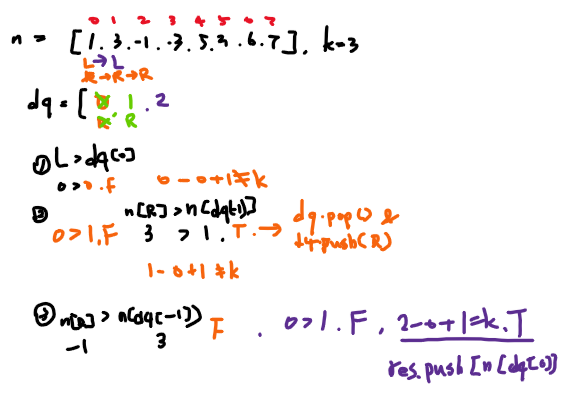

In [3]:
# O(n) O(k)
# Monotonic queue, deque(double queue)
# dq[r] push r_idx and pop(r) if num[r] > num[dq[-1]]
# dq[l] pop(0) if l_indx > dq[0]
# if r - l + 1 = k, res push num[dq[0]]
'''
Example : [1,3,-1,-3,5,3,6,7] k = 3
dq                r  l  res
deque([0])        0  0  []
deque([1])        1  0  []
deque([1, 2])     2  1  []
deque([1, 2, 3])  3  2  [3]
deque([4])        4  3  [3, 3, 5]
deque([4, 5])     5  4  [3, 3, 5, 5]
deque([6])        6  5  [3, 3, 5, 5, 6]
deque([7])        7  6  [3, 3, 5, 5, 6, 7]
'''
from collections import deque
class Solution:
    def maxSlidingWindow(self, nums: list[int], k: int) -> list[int]:
        if k == 1:
            return nums
        
        n, l  = len(nums), 0
        res, dq = [], deque()
        for r in range(n):
            while dq and nums[r] > nums[dq[-1]]:
                dq.pop()
            dq.append(r)
            if l > dq[0]:
                dq.popleft()
            if r - l + 1 == k:
                l += 1
                res.append(nums[dq[0]])
            print(dq,r,l,res)
        return res
ans = Solution()
ans.maxSlidingWindow([1,3,-1,-3,5,3,6,7], 3)

deque([0]) 0 0 []
deque([1]) 1 0 []
deque([1, 2]) 2 1 [3]
deque([1, 2, 3]) 3 2 [3, 3]
deque([4]) 4 3 [3, 3, 5]
deque([4, 5]) 5 4 [3, 3, 5, 5]
deque([6]) 6 5 [3, 3, 5, 5, 6]
deque([7]) 7 6 [3, 3, 5, 5, 6, 7]


[3, 3, 5, 5, 6, 7]

In [1]:
# TLE O(nk) O(k)
class Solution:
    def maxSlidingWindow(self, nums: list[int], k: int) -> list[int]:
        if k == 1:
            return nums
        max_lst = []
        n = len(nums)
        curr = 0
        while curr + k <= n:
            tempmax = max(nums[curr:curr + k])
            max_lst.append(tempmax)
            curr += 1
        return max_lst
        
ans = Solution()
ans.maxSlidingWindow([1,3,-1,-3,5,3,6,7], 3)

[3, 3, 5, 5, 6, 7]